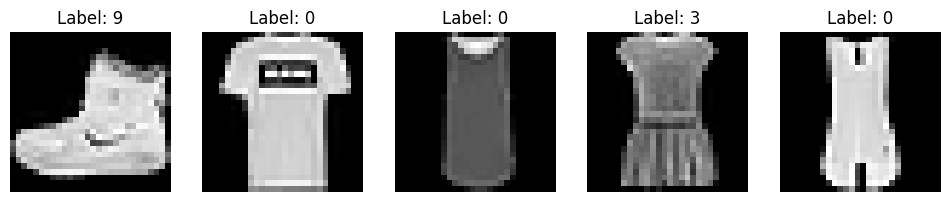

In [13]:
import numpy as np
from scipy.stats import multivariate_normal, norm
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss

# Load data
train_data = np.load('./hw2_fashionmnist/train.npy')
train_labels = np.load('./hw2_fashionmnist/trainlabels.npy')
test_data = np.load('./hw2_fashionmnist/test.npy')
test_labels = np.load('./hw2_fashionmnist/testlabels.npy')

# Visualize some data-points
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
for i in range(5):
    ax[i].imshow(train_data[i].reshape((28, 28)), cmap='gray')
    ax[i].set_title(f'Label: {train_labels[i]}')
    ax[i].axis('off')
plt.show()


In [14]:
# Flatten data
train_data = train_data.reshape(train_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)

starting 2 run
starting 4 run
starting 8 run
starting 16 run
starting 32 run
starting 64 run
starting 128 run
starting 256 run
starting 512 run
starting 1024 run
starting 2048 run
starting 4096 run
starting 8192 run


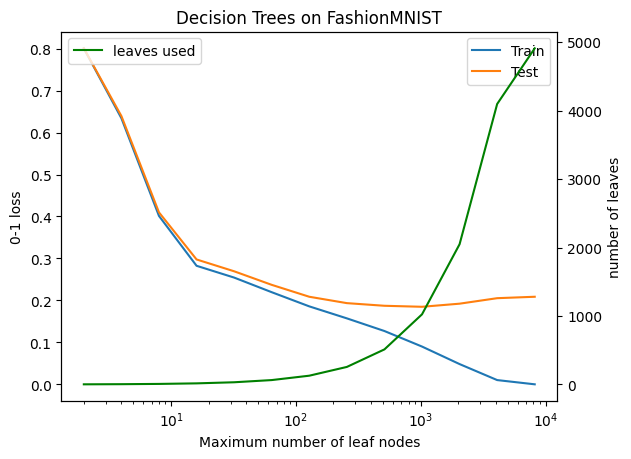

In [8]:


# Define range of maximum number of leaf nodes
max_leaf_nodes = [2**i for i in range(1, 14)]

# Train decision trees with varying max leaf nodes
train_losses = []
test_losses = []
num_leaves = []
for max_leaf in max_leaf_nodes:
    print(f"starting {max_leaf} run")
    # Train decision tree
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf)
    clf.fit(train_data, train_labels)
    
    # Compute train loss
    train_pred = clf.predict(train_data)
    train_loss = np.mean(train_pred != train_labels)
    train_losses.append(train_loss)
    
    # Compute test loss
    test_pred = clf.predict(test_data)
    test_loss = np.mean(test_pred != test_labels)
    test_losses.append(test_loss)
    num_leaves.append(clf.get_n_leaves())

fig, ax1 = plt.subplots()
ax1.plot(max_leaf_nodes, train_losses, label='Train')
ax1.plot(max_leaf_nodes, test_losses, label='Test')
plt.xscale('log')
plt.xlabel('Maximum number of leaf nodes')
plt.ylabel('0-1 loss')
plt.title('Decision Trees on FashionMNIST')
ax1.legend()

# Add second y-axis for number of leaves
ax2 = ax1.twinx()
ax2.plot(max_leaf_nodes, num_leaves, 'g', label='leaves used')
ax2.set_ylabel('number of leaves')
ax2.legend()

plt.show()


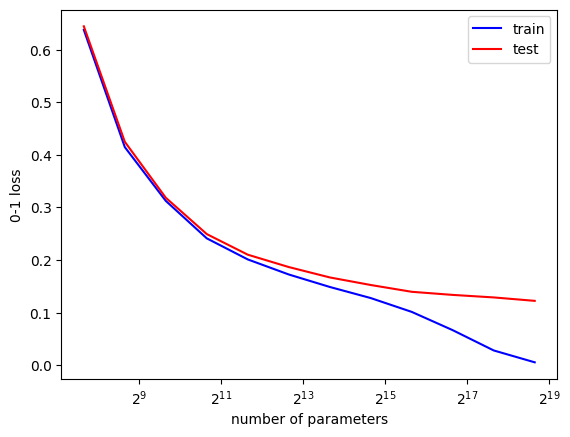

In [16]:

# Train random forest with varying max_leaf_nodes
max_leaf_nodes = [2**i for i in range(1, 13)]
train_loss = []
test_loss = []
num_params = []
for nodes in max_leaf_nodes:
    clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=nodes)
    clf.fit(train_data, train_labels)
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    train_loss.append(zero_one_loss(train_labels, train_pred))
    test_loss.append(zero_one_loss(test_labels, test_pred))
    num_params.append(len(clf.estimators_) * nodes)

# Plot 0-1 loss vs number of parameters
fig, ax = plt.subplots()
ax.plot(num_params, train_loss, 'b', label='train')
ax.plot(num_params, test_loss, 'r', label='test')
ax.set_xlabel('number of parameters')
ax.set_ylabel('0-1 loss')
ax.set_xscale('log', base=2)
ax.legend()
plt.title("Random Forest Loss vs. Number Parameters")

plt.show()


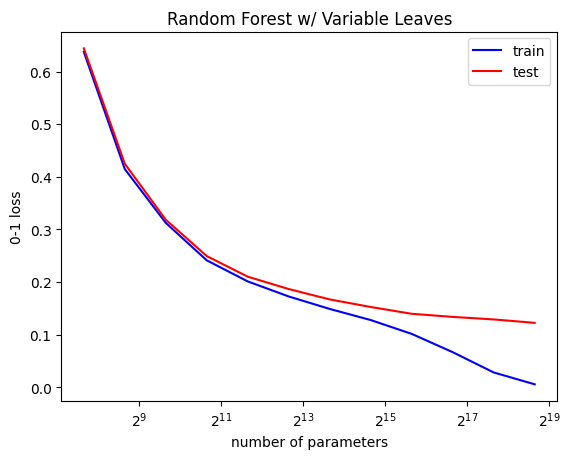

In [17]:
from sklearn.ensemble import RandomForestClassifier

max_leaf_nodes = 16
num_trees_list = [1, 10, 100, 1000]
train_error_list = []
test_error_list = []
total_params_list = []

for num_trees in num_trees_list:
    clf = RandomForestClassifier(n_estimators=num_trees, max_leaf_nodes=max_leaf_nodes, random_state=0)
    clf.fit(train_data, train_labels)
    train_preds = clf.predict(train_data)
    train_error = np.mean(train_preds != train_labels)
    test_preds = clf.predict(test_data)
    test_error = np.mean(test_preds != test_labels)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    total_params_list.append(num_trees * clf.estimators_[0].tree_.node_count)

fig, ax1 = plt.subplots()
ax1.plot(total_params_list, train_error_list, 'b', label='Train Error')
ax1.plot(total_params_list, test_error_list, 'r', label='Test Error')
ax1.set_xlabel('Total Number of Parameters (log scale)')
ax1.set_ylabel('0-1 Loss')
ax1.set_xscale('log')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(total_params_list, [max_leaf_nodes] * len(total_params_list), 'g', label='Max Leaf Nodes')
ax2.set_ylabel('Max Leaf Nodes')
ax2.legend(loc='lower right')

plt.title('Random Forest Classifier with Max Leaf Nodes = {}'.format(max_leaf_nodes))
plt.show()
